# Data Mining Project 
### Laila Mohamed Aborizka 18P9654
### Ilaria Refaat 18P3050
### Hana Yasser Amgad 18P5007


In [1]:
from google.colab import files
  
  
uploaded = files.upload()

Saving data_banknote_authentication.txt to data_banknote_authentication (3).txt


In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
import pandas as pd
import io

In [3]:
#common imports 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [4]:
# read in banknote authentication set
df = pd.read_csv(io.BytesIO(uploaded['data_banknote_authentication.txt']), names=['variance', 'skewness', 'curtosis', 'entropy', 'class'], header=0)

In [5]:
df.head()

variance  skewness  curtosis  entropy  class
0   4.54590    8.1674   -2.4586 -1.46210      0
1   3.86600   -2.6383    1.9242  0.10645      0
2   3.45660    9.5228   -4.0112 -3.59440      0
3   0.32924   -4.4552    4.5718 -0.98880      0
4   4.36840    9.6718   -3.9606 -3.16250      0

In [6]:
# divide data
X=df.iloc[:,:-1].values
Y=df['class']

In [7]:
# Normalize data
# The goal of normalization is to change the values of numeric columns in the dataset 
# to use a common scale, without distorting differences in the ranges of values or losing information. 
# Normalization is also required for some algorithms to model the data correctly.
from sklearn.preprocessing import StandardScaler
Normalized = StandardScaler()
Normalized.fit(X)
X = Normalized.transform(X)

# KNN Classifier

In [8]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X, Y, test_size=0.20,random_state=3)

The optimal number of neighbors is 3.


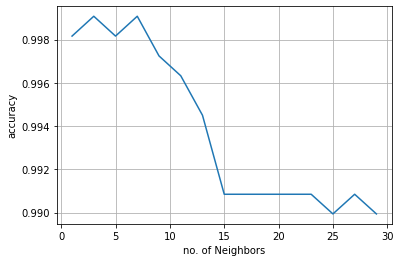

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
k_List = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, k_List))

# list that will hold accuracy 
acc_score = []

# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (knn) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    acc_scores = cross_val_score(knn, x_train_knn, y_train_knn, cv=10, scoring='accuracy')
    acc_score.append(acc_scores.mean())

# determining best k (k that provided maximum accuracy)
best_k = neighbors[acc_score.index(max(acc_score))]
print('The optimal number of neighbors is %d.' % best_k)

# plot accuracy vs k 
plt.plot(neighbors, acc_score)
plt.xlabel('no. of Neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [10]:
# train model on best k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(x_train_knn, y_train_knn)
y_pred_knn = knn_classifier.predict(x_test_knn)

Data visualization of original test data


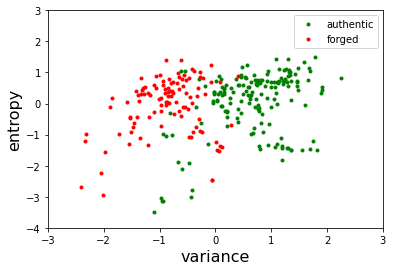

In [11]:
#plot original data
print('Data visualization of original test data')
plt.plot(x_test_knn[y_test_knn==0,0],x_test_knn[y_test_knn==0,3],'g.')
plt.plot(x_test_knn[y_test_knn==1,0],x_test_knn[y_test_knn==1,3],'r.')
plt.xlabel('variance', fontsize=16)
plt.ylabel('entropy', fontsize=16)
plt.ylim(-4,3)
plt.xlim(-3,3)
plt.legend(['authentic','forged'],loc='upper right')

Data visualization of predicted data


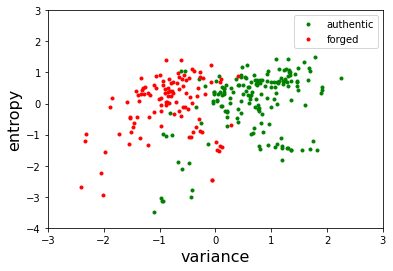

In [12]:
#plot predicted data
print('Data visualization of predicted data')
plt.plot(x_test_knn[y_pred_knn==0,0],x_test_knn[y_pred_knn==0,3],'g.')
plt.plot(x_test_knn[y_pred_knn==1,0],x_test_knn[y_pred_knn==1,3],'r.')
plt.xlabel('variance', fontsize=16)
plt.ylabel('entropy', fontsize=16)
plt.ylim(-4,3)
plt.xlim(-3,3)
plt.legend(['authentic','forged'],loc='upper right')

KNN boundary for k = 3


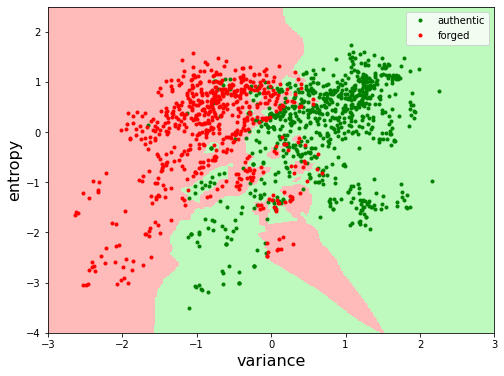

In [13]:
# KNN Boundary Visualization 
from sklearn import neighbors
print ('KNN boundary for k = %d' % best_k)
# object generated from a list of colors (red,green)
cmap_light = ListedColormap(['#befabe','#ffbaba' ])
clf = neighbors.KNeighborsClassifier(best_k)
# taking two features only to be able to plot them
clf.fit(x_train_knn[:,[0,3]], y_train_knn)
var_min, var_max = X[:, 0].min() - 1, X[:, 0].max() + 1
ent_min, ent_max = X[:, 3].min() - 1, X[:, 3].max() + 1
# create a rectangular grid out of two given one-dimensional arrays (meshgrid)
# The two arrays are evenly spaced values within a given interval (one for variance and one for entropy with step 0.02).
var, ent = np.meshgrid(np.arange(var_min, var_max, 0.02),np.arange(ent_min, ent_max, 0.02))
# predict each point 
Z = clf.predict(np.c_[var.ravel(), ent.ravel()])
Z = Z.reshape(var.shape)
plt.figure(figsize=(8, 6))
# colormap the values (Z) based on the colors in the cmap (red for forged region and green for authentic region) 
plt.pcolormesh(var, ent, Z, cmap=cmap_light,shading='auto')
plt.plot(X[Y==0,0],X[Y==0,3],'g.')
plt.plot(X[Y==1,0],X[Y==1,3],'r.')
plt.xlabel('variance', fontsize=16)
plt.ylabel('entropy', fontsize=16)
plt.ylim(-4,2.5)
plt.xlim(-3,3)
plt.legend(['authentic','forged'],loc='upper right')
plt.show()

[[167   1]
 [  0 107]]
Accuracy: 0.996
Precision: 0.991
Recall: 1.000
F-Measure: 0.995


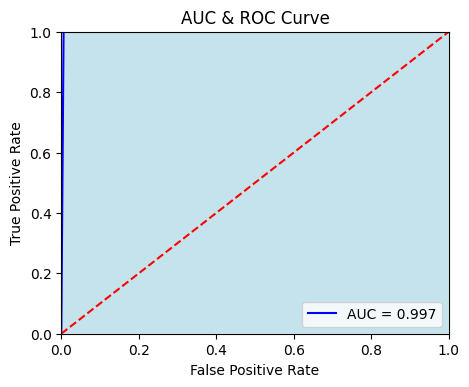

In [14]:
# evaluation
print(confusion_matrix(y_test_knn, y_pred_knn))
# calculate accuracy
knn_accuracy = accuracy_score(y_test_knn, y_pred_knn)
print('Accuracy: %.3f' % knn_accuracy)
# calculate precision
knn_precision = precision_score(y_test_knn, y_pred_knn, average='binary')
print('Precision: %.3f' % knn_precision)
# calculate recall
knn_recall = recall_score(y_test_knn, y_pred_knn, average='binary')
print('Recall: %.3f' % knn_recall)
# calculate f1-score
knn_f1_score = f1_score(y_test_knn, y_pred_knn, average='binary')
print('F-Measure: %.3f' % knn_f1_score)
# plotting ROC using tpr, fpr 
# predict probabilities
y_score_knn = knn_classifier.predict_proba(x_test_knn)
# keep probabilities for the positive outcome only (forged) because this is the parameter to be given to roc_curve
y_score_knn = y_score_knn[:, 1]
#calculate
fpr, tpr, threshold =  metrics.roc_curve(y_test_knn, y_score_knn)
#calculate auc
auc = metrics.roc_auc_score(y_test_knn, y_score_knn)
#plot
plt.figure(figsize=(5, 4), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Decion Tree Classifier**

In [15]:
x_train_DT, x_test_DT, y_train_DT, y_test_DT = train_test_split(X, Y, test_size=0.20,random_state=3)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Perform a cross validation to get the optimum depth of the decision tree

 **Gini**

In [17]:
crossValidationScores = []
for i in range(2,20):
    clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=i,random_state=3)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf_gini, X=x_train_DT, y=y_train_DT, cv=10, n_jobs=4)
    crossValidationScores.append((scores.mean()))
best_depth=crossValidationScores.index(max(crossValidationScores))+1
print(crossValidationScores)
print(best_depth)

[0.8958798999165971, 0.9233110925771477, 0.9525521267723104, 0.9680650542118432, 0.9753544620517097, 0.9817431192660552, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642, 0.9808340283569642]
6


In [18]:
clf_gini= DecisionTreeClassifier(criterion='gini',max_depth=best_depth,random_state=3)
clf_gini.fit(x_train_DT,y_train_DT)

DecisionTreeClassifier(max_depth=6, random_state=3)

In [19]:
y_pred_gini= clf_gini.predict(x_test_DT)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


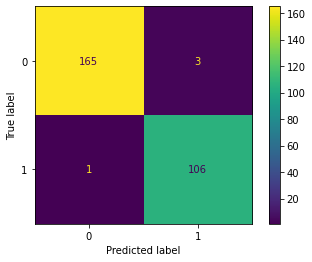

In [20]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(clf_gini,x_test_DT, y_test_DT)

Calculating the precision, recall, F1 and accuracy of our model.


accuracy score: 0.9854545454545455
f-1 score: 0.9814814814814815
precision_score: 0.9724770642201835
recall_score: 0.9906542056074766


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


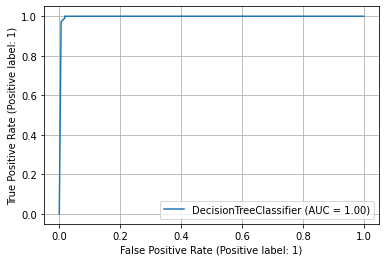

In [21]:
from sklearn.metrics import  plot_roc_curve
print('accuracy score:',accuracy_score(y_test_DT, y_pred_gini))
print('f-1 score:',f1_score(y_test_DT, y_pred_gini))
print('precision_score:',precision_score(y_test_DT, y_pred_gini))
print('recall_score:',recall_score(y_test_DT, y_pred_gini))
plot_roc_curve(clf_gini, x_test_DT, y_test_DT)
plt.grid()

In [22]:
Features=['variance', 'skewness', 'curtosis', 'entropy']


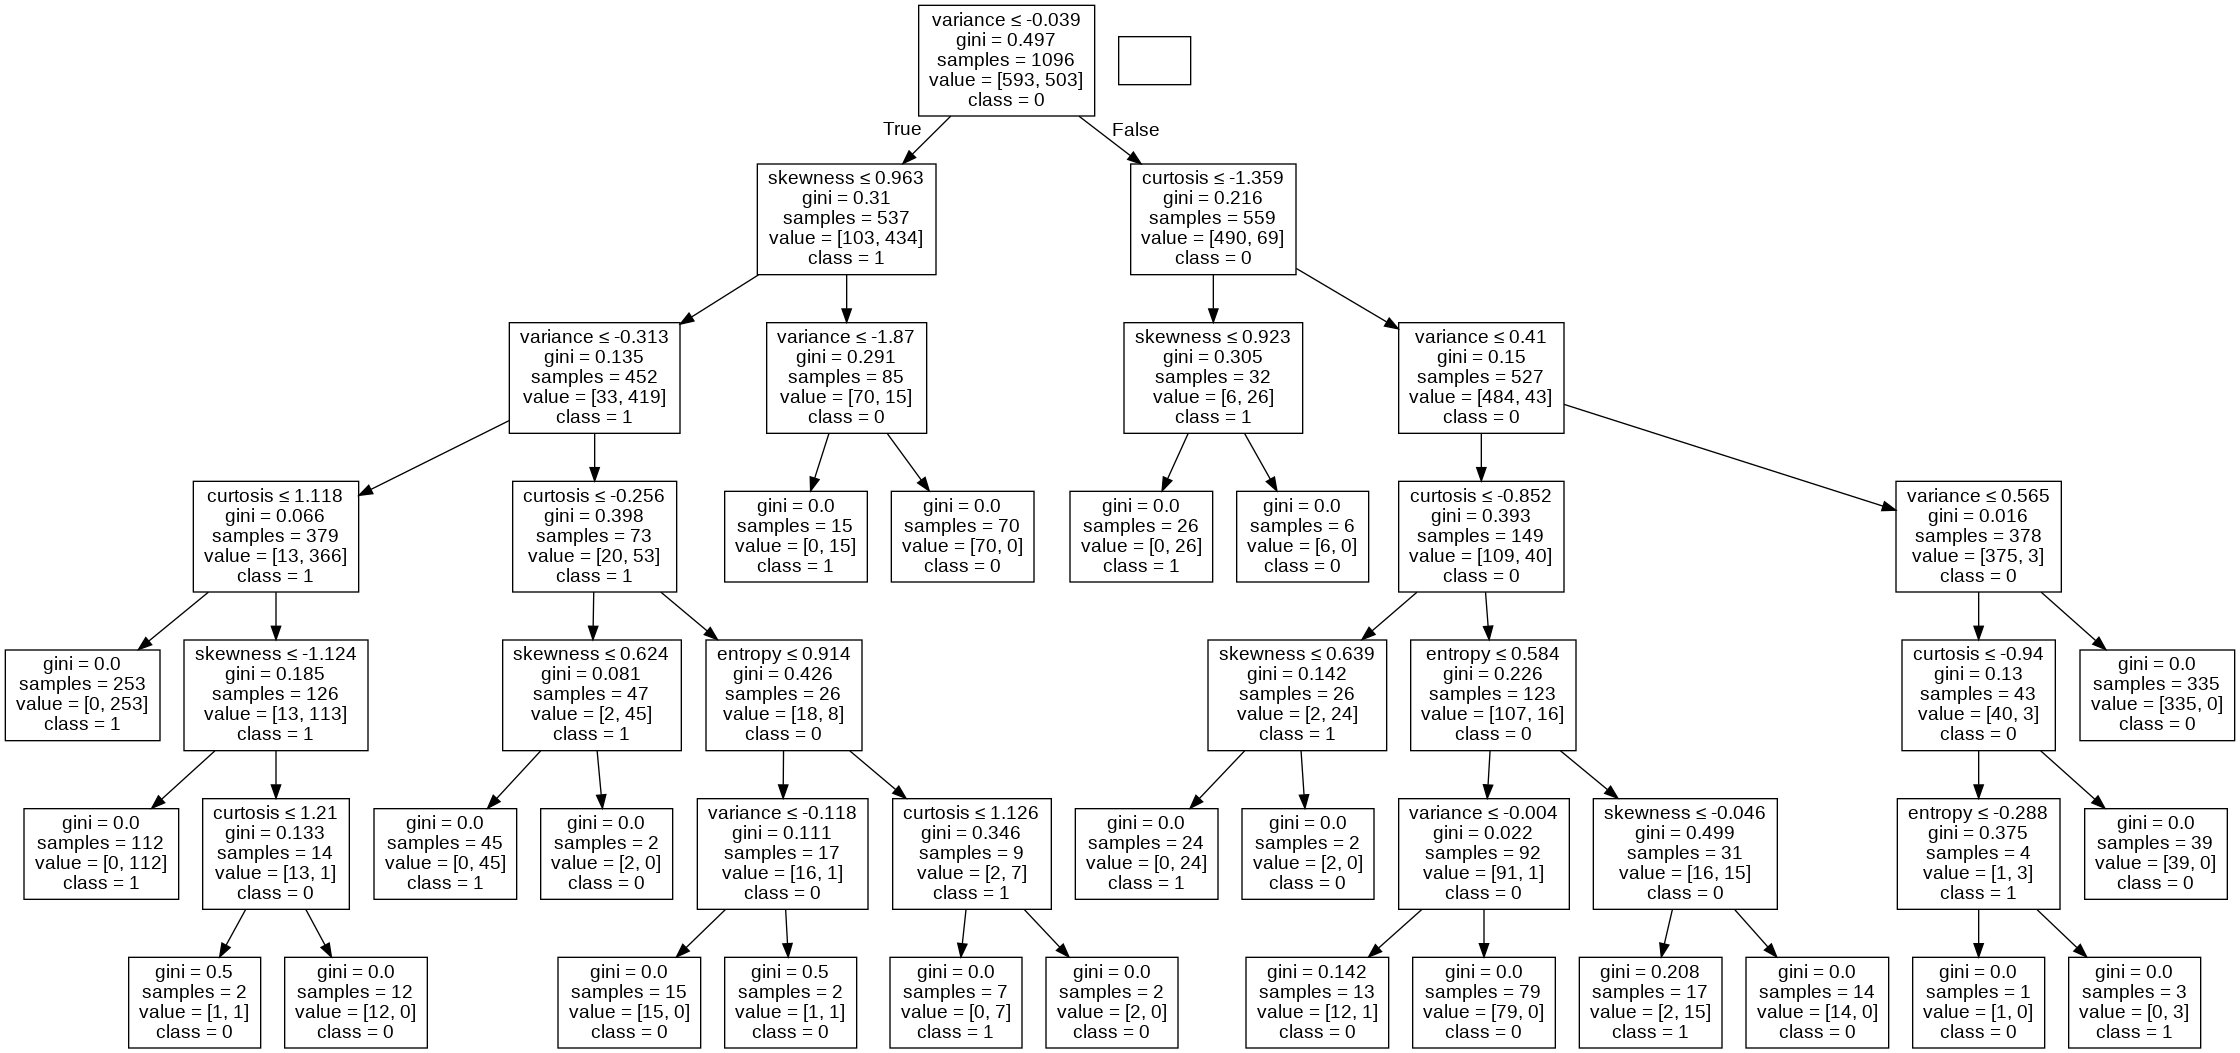

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                special_characters=True,feature_names = Features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('GiniTree.png')
Image(graph.create_png())

# K-Means clustering


In [24]:
from sklearn.cluster import KMeans

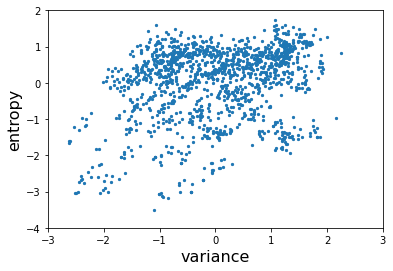

In [25]:
plt.scatter(X[:,0],X[: ,3],s=5)
plt.xlim(-3,3)
plt.ylim(-4,2)
plt.xlabel('variance', fontsize=16)
plt.ylabel('entropy', fontsize=16)
plt.show()

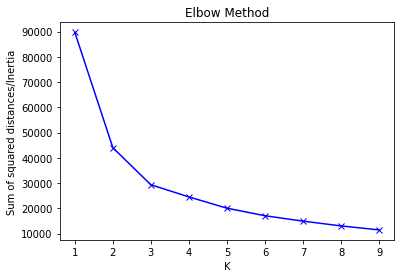

In [26]:
# find the best no for clusters using the elbow method
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df.iloc[:,:-1])
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method')
plt.show()

[[-0.22878981  0.90866234 -0.70965393 -1.14375976]
 [-0.80203983 -1.46966948  1.66633612  0.37306707]
 [ 0.45156368 -0.07036718 -0.13698228  0.63522767]]


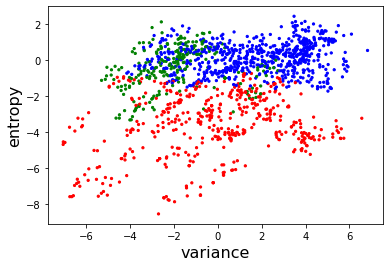

In [28]:
# Elbow at 3
kmeans = KMeans(3)
kmeans.fit(X)
clusters = kmeans.fit_predict(X)
df_with_clusters = df.copy()
df_with_clusters['clusters'] = clusters 
#plot clusters 
plt.xlabel('variance', fontsize=16)
plt.ylabel('entropy', fontsize=16)
cmap= ListedColormap(['red', 'green','blue' ]) #colormap for different clusters 
plt.scatter(df_with_clusters['variance'],df_with_clusters['entropy'],c=df_with_clusters['clusters'],cmap=cmap,s=5)
centroids  = kmeans.cluster_centers_
print (centroids) # print final centroids